First Stub of The Forcasting Model To Predict the Number of Customers on Monthly Basis.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [64]:
dataset = pd.read_csv('rentals.csv', index_col=2)

In [65]:
dataset.drop(['start_time',
              'end_time',
              'start_time.1',
              'end_time.1',
              'total_hours_by_day',
              'start_hour',
              'start_week'
              ],axis=1,inplace=True)

In [66]:
dataset=dataset.fillna(0)
dataset.head()

,end_date,total_time,total_hours,gender,user_id,start_weekday,review
start_date,,,,,,,
2016-12-21,2017-01-08,14:00:00,432,F,9333,Wednesday,0.0
2016-12-21,2017-01-06,23:00:00,360,M,15763,Wednesday,0.0
2016-12-21,2017-01-02,14:00:00,288,M,5081,Wednesday,0.0
2016-12-22,2017-01-01,14:00:00,240,M,1991,Thursday,0.0
2016-12-23,2017-01-01,11:00:00,216,M,9590,Friday,5.0


In [67]:
# Number of Users Each Day

df = dataset.groupby("start_date").agg({"user_id": pd.Series.nunique})


df.columns = [x for x in df.columns.ravel()]


df.reset_index(level=0, inplace=True)


df.sort_values('start_date',ascending=False)

df.head()

,start_date,user_id
0,2016-12-21,3
1,2016-12-22,1
2,2016-12-23,6
3,2016-12-24,1
4,2016-12-25,2


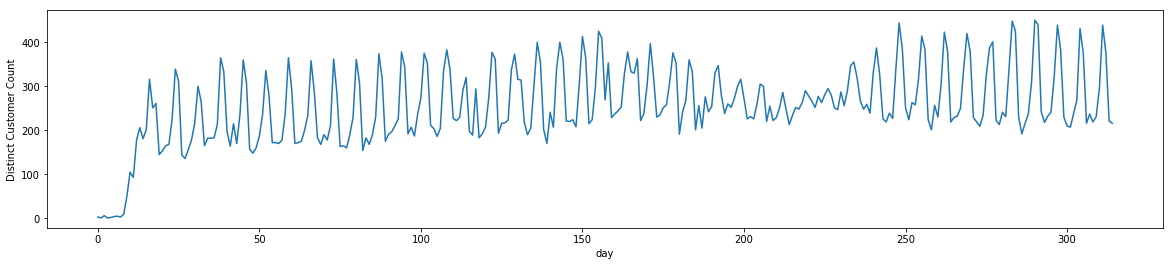

In [68]:
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('day')
ax.set_ylabel('Distinct Customer Count')
plt.plot(df.index, df['user_id']);

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                user_id   No. Observations:                  315
Model:                ARIMA(12, 1, 0)   Log Likelihood               -1621.516
Date:                Sun, 07 Mar 2021   AIC                           3269.032
Time:                        21:41:52   BIC                           3317.774
Sample:                             0   HQIC                          3288.509
                                - 315                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3753      0.053     -7.129      0.000      -0.478      -0.272
ar.L2         -0.6649      0.042    -15.655      0.000      -0.748      -0.582
ar.L3         -0.4319      0.051     -8.464      0.000      -0.532      -0.332
ar.L4         -0.4443      0.050     -8.973      0.000      -0.541      -0.347
ar.L5         -0.3761      0.053     -7.123      0.000      -0.480      -0.273
ar.L6         -0.2714      0.056     -4.823      0.000      -0.382      -0.161
ar.L7          0.1987      0.054      3.667      0.000       0.093       0.305
ar.L8          0.0485      0.062      0.787      0.432      -0.072       0.169
ar.L9          0.0802      0.058      1.393      0.164      -0.033       0.193
ar.L10        -0.0689      0.066     -1.046      0.295      -0.198       0.060
ar.L11        -0.0045      0.059     -0.077      0.939      -0.119       0.110
ar.L12        -0.1869      0.046     -4.056      0.000      -0.277      -0.097
sigma2      1762.2221    117.588     14.986      0.000    1531.754    1992.691
===================================================================================
Ljung-Box (Q):                       52.79   Jarque-Bera (JB):                88.77
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

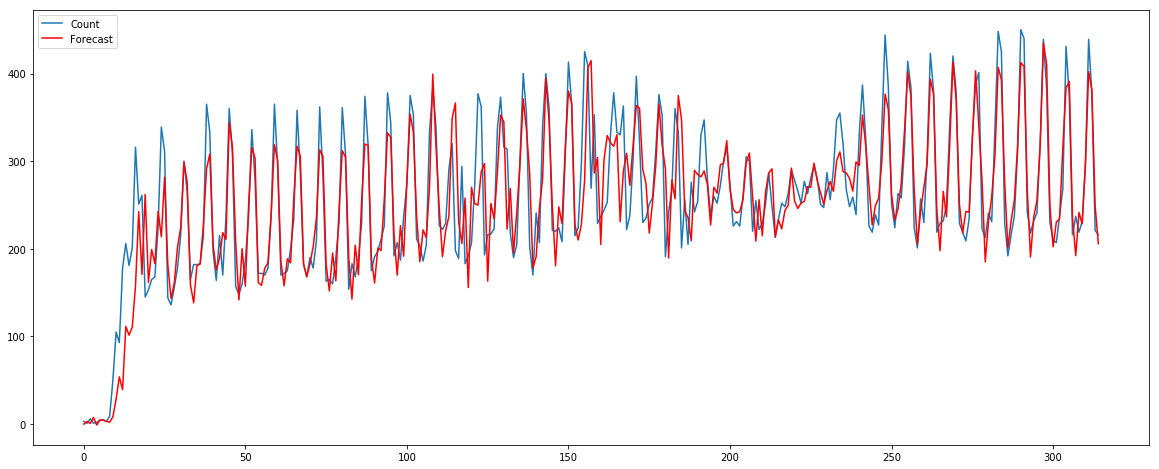

In [101]:
fig = plt.figure(figsize=(20,8))
model = ARIMA(df['user_id'], order=(12,1,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df['user_id'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Count', 'Forecast'])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                user_id   No. Observations:                  315
Model:                ARIMA(12, 1, 0)   Log Likelihood               -1621.516
Date:                Sun, 07 Mar 2021   AIC                           3269.032
Time:                        21:41:54   BIC                           3317.774
Sample:                             0   HQIC                          3288.509
                                - 315                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3753      0.053     -7.129      0.000      -0.478      -0.272
ar.L2         -0.6649      0.042    -15.655      0.000      -0.748      -0.582
ar.L3         -0.4319      0.051     -8.464      0.000      -0.532      -0.332
ar.L4         -0.4443      0.050     -8.973      0.000      -0.541      -0.347
ar.L5         -0.3761      0.053     -7.123      0.000      -0.480      -0.273
ar.L6         -0.2714      0.056     -4.823      0.000      -0.382      -0.161
ar.L7          0.1987      0.054      3.667      0.000       0.093       0.305
ar.L8          0.0485      0.062      0.787      0.432      -0.072       0.169
ar.L9          0.0802      0.058      1.393      0.164      -0.033       0.193
ar.L10        -0.0689      0.066     -1.046      0.295      -0.198       0.060
ar.L11        -0.0045      0.059     -0.077      0.939      -0.119       0.110
ar.L12        -0.1869      0.046     -4.056      0.000      -0.277      -0.097
sigma2      1762.2221    117.588     14.986      0.000    1531.754    1992.691
===================================================================================
Ljung-Box (Q):                       52.79   Jarque-Bera (JB):                88.77
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

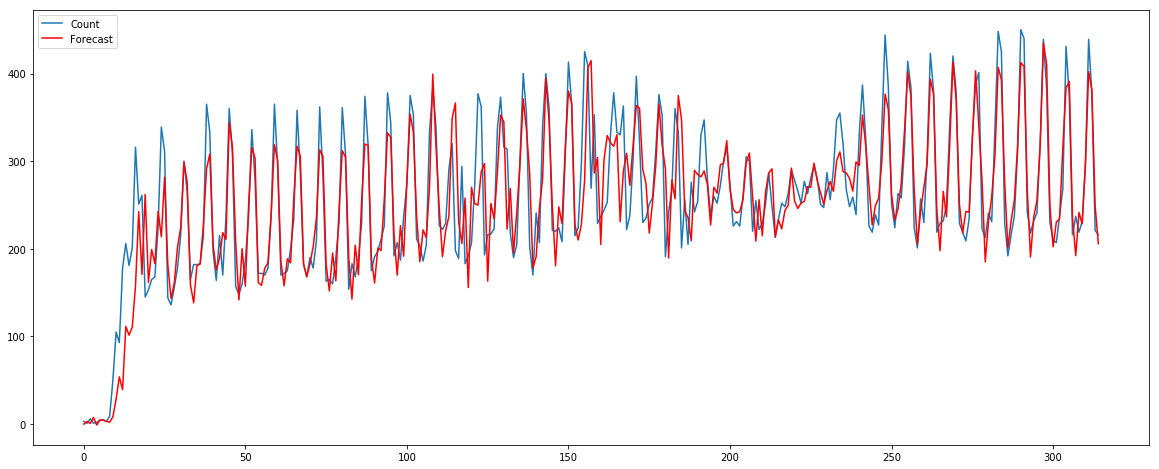

In [102]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df['user_id'], order=(12,1,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df['user_id'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Count', 'Forecast'])
results.summary()


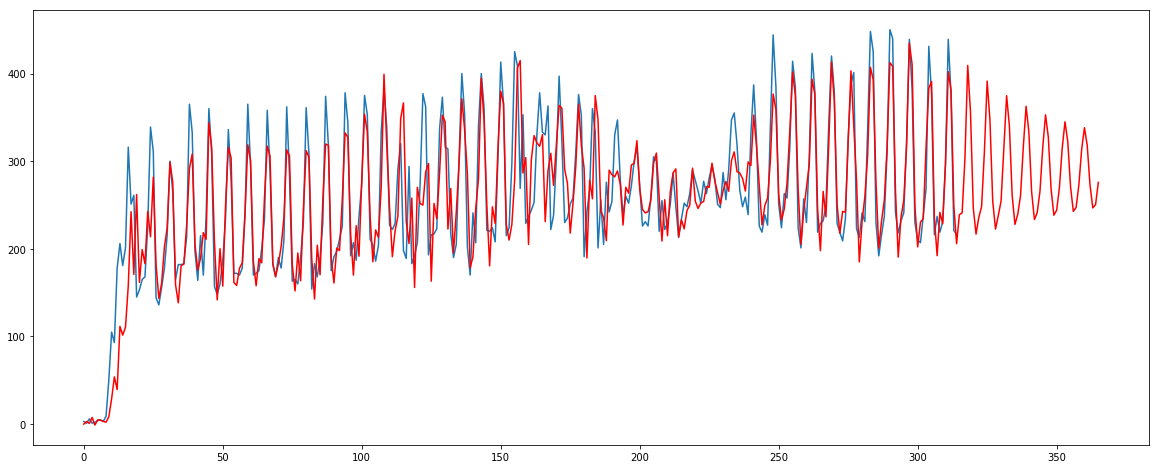

In [100]:
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(df['user_id'])
x = results.predict(start=(0), end=(365), dynamic=False)
plt.plot(df['user_id'][:320])
plt.plot(x, color='r') 

The ARIMA(1,0,0) tends to capture the average of the overall trend, underpredicting during years of higher car count and overpredicting during years of lower car count. The trends from the earlier years cause the forecast prediction to be high. The ARIMA(1,0,1) does better with overall trend but does not do so great with the variability and noise.

ARIMA models should be interpreted with caution. While they can be effective in capturing seasonality and the overall trend, they can fall short in forecasting values that fall significantly outside the norm.


When it comes to forecasting such values, statistical tools such as Monte Carlo simulations can be more effective in modelling a potential range of more extreme values.